In [1]:
include("Create_Sample.jl")
include("MIP_SPLIT.jl")
include("Split.jl")
include("GA.jl")
include("Initial.jl")
include("Mutation.jl")
include("Crossover.jl")
include("Neighborhood.jl")
include("Neighborhood_intra.jl")
include("costs.jl")
include("Draw.jl")
include("Escape.jl")
include("cross_escape.jl")


InterruptException: InterruptException:

In [2]:
instances = [:eil51, :berlin52, :eil76, :rat99]
LKH3 = [[222.7, 159.6, 124.0, 112.1],[4110.2, 3184.2, 2440.9, 2440.9], [280.9, 196.7, 143.4, 128.2],[690.8, 523.3, 467.0,442.5]]
Ms = [5] #, 3, 5, 7]

best_v = Float64[]
Avg_v = Float64[]
worst_v = Float64[]

count = 0
best_ = 0.0
Avg_ = 0.0
worst_ = 0.0
time_ = 0.0
P = Chromosome[]
best_chrm = Chromosome(Int[], 0.0, 0.0, Tour[])
worst_chrm = Chromosome(Int[], 0.0, 0.0, Tour[])
crossover_functions = [5,7,8]
demands = Int[]
W = 150
for (i,instance) in enumerate(instances)
    for (j,K) in enumerate(Ms)
        count += 1
        T = Read_TSPLIB_instance(instance, 1)
        n = size(T)[1]-2
        tsp = readTSPLIB(instance)
        allNodes = tsp.nodes
        depot = allNodes[1, :]

        Customers = allNodes[2:n+1, :]
        
        demands = ones(Int, n)
        W = 150
        h = 0.3
        popsize = (20,40)
        k_tournament = 2
        num_iter = 2500
        time_limit = Inf
        Mutation_Chance = 0.0
        
        num_runs = 2
        num_nei = 2
        avg = 0.0
        best = Inf
        worst = 0.0
        t1 = time() 
        P = Chromosome[]
        for i=1:num_runs
#             println("run ", i)
            P, roullet = Perform_Genetic_Algorithm(T, demands,K, W, h, popsize, 
                k_tournament, num_iter, time_limit, Mutation_Chance, num_nei, crossover_functions, copy(transpose(Customers)), depot);
#             roullet_ = roullet_ + roullet
            avg += P[1].fitness
            if P[1].fitness < best
                best = P[1].fitness
                best_chrm = P[1]
            end
            if P[1].fitness > worst
                worst = P[1].fitness
                worst_chrm = P[1]
            end
#             if P[1].fitness < 223
#                 break
#             end
        end
        t2 = time()
        println("Results for ", instance, " ,m=", K)
        println("Best: ", round(best, digits = 1), "  Average: ", round(avg/num_runs, digits = 1), 
            "  Worst: ", round(worst, digits = 1), " , run time= ", round((t2-t1)/num_runs, digits=0))
        best_ += 100*(best-LKH3[i][j])/LKH3[i][j]
        worst_ += 100*(worst-LKH3[i][j])/LKH3[i][j]
        Avg_ += 100*(avg/num_runs-LKH3[i][j])/LKH3[i][j]
        time_ += t2-t1
    end
end
push!(best_v, best_/count)
push!(worst_v, worst_/count)
push!(Avg_v, Avg_/count)
println("Results:  Best: ", round(best_/count, digits=1), "  Average: ", round(Avg_/count, digits=1), "  Worst: ", round(worst_/count, digits=1), "   run time: ", round(time_/count, digits=1))
K = Ms[1]

LoadError: InterruptException:

Tour 1:
47 5 13 23 42 22 6 25 7 30 27 2 35 34 19 28 20 33 29 8 49 15 1 21 31 
10 37 4 48 9 38 32 44 14 36 16 43 41 18 39 40 12 24 17 3 46 11 45 50 26 

cost=442.8822986646737


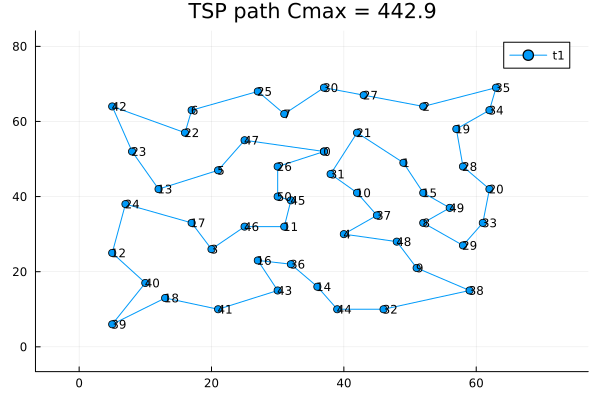

In [3]:
T = Read_TSPLIB_instance(:eil51, 1)
tsp = readTSPLIB(:eil51)
allNodes = tsp.nodes
n_nodes = size(allNodes)[1] - 1
depot = allNodes[1, :]

Customers = allNodes[2:n_nodes+1, :];

b = best_chrm.genes
tours = [Tour(b, find_tour_length(b, T))]
c = Chromosome(b, 0.0, 0.0, tours)
Draw_Solution(c, depot, Customers, "TSP path", find_tour_length(b, T))

Tour 1:
47 5 13 23 42 22 6 25 7 30 27 2 35 34 19 28 20 33 29 8 49 15 1 21 
cost=221.59805875781126
Tour 2:
31 10 37 4 48 9 38 32 44 14 36 16 43 41 18 39 40 12 24 17 3 46 11 45 50 
26 
cost=222.73337033830651


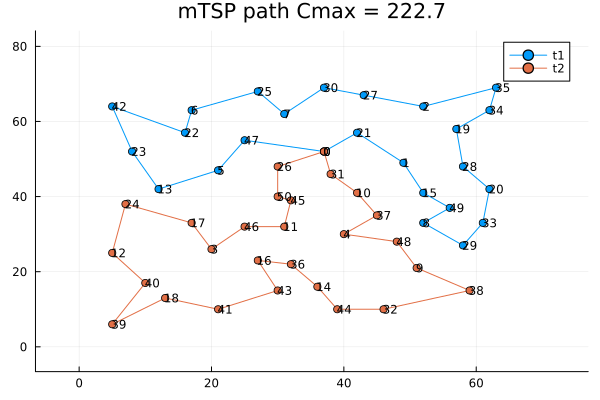

In [4]:
Draw_Solution(best_chrm, depot, Customers, "mTSP path" , best_chrm.fitness)

Tour 1:
21 7 25 30 27 2 35 34 19 28 1 15 49 20 33 29 8 48 9 38 32 44 14 43 41 
18 39 40 12 24 13 23 42 6 22 47 5 26 50 45 11 46 17 3 16 36 4 37 10 31 

cost=428.871


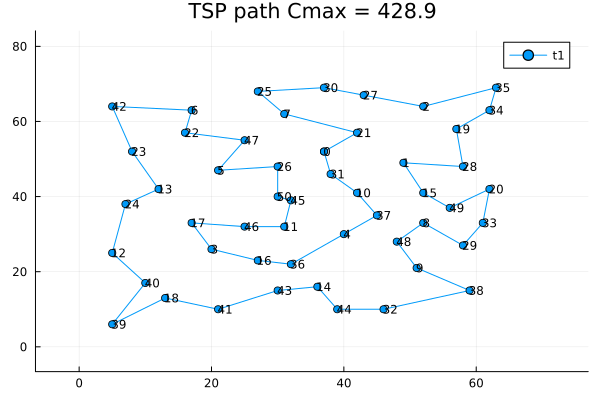

In [5]:
tsp_tour, l = find_tsp_tour1(T[1:n_nodes+1, 1:n_nodes+1])

tours = [Tour(tsp_tour, l)]
c = Chromosome(tsp_tour, 0.0, 0.0, tours)
Draw_Solution(c, depot, Customers, "TSP path", l)

Tour 1:
21 7 25 30 27 2 35 34 19 28 1 15 49 20 33 29 8 48 9 38 32 44 14 43 41 

cost=255.80688778171321
Tour 2:
18 39 40 12 24 13 23 42 6 22 47 5 26 50 45 11 46 17 3 16 36 4 37 10 31 

cost=255.25828754091293


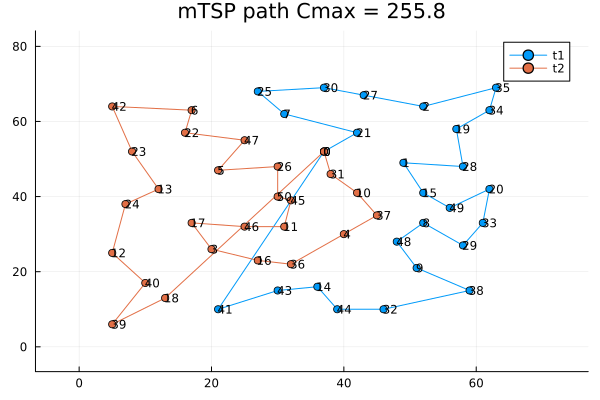

In [6]:
K = 2
obj, trips = SPLIT(T, demands, K, W, tsp_tour)
offspring = Chromosome(tsp_tour, obj, 0.0, trips)
Draw_Solution(offspring, depot, Customers, "mTSP path", obj)

In [298]:
include("GA.jl")
include("Initial.jl")
include("Neighborhood.jl")
include("costs.jl")
include("Mutation.jl")
# include("Create_Sample.jl")
using Distances
dir_name = "set1"
sample_name = "mtsp150_3"
m, T, depot, customers = read_data(dir_name, sample_name)
n = size(T)[1]-2
demands = ones(Int, n)
W = 1000
h = 0.1
popsize = (20,20)
k_tournament = 6
num_iter = 10000000
time_limit = n*240/100
Mutation_Chance = 0.05
num_runs = 10
num_nei = 2
avg = 0.0
best = Inf
worst = 0.0
crossover_functions = [5,7,8]
best_chrm = Chromosome(Int[], 0.0, 0.0, Tour[])
worst_chrm = Chromosome(Int[], 0.0, 0.0, Tour[])
all_chrms = Chromosome[]
t1 = time()
for i=1:num_runs
    P, roullet = Perform_Genetic_Algorithm(T, demands,m, W, h, popsize, 
                k_tournament, num_iter, time_limit, Mutation_Chance, num_nei, crossover_functions, customers, depot);
#             roullet_ = roullet_ + roullet
    avg += P[1].fitness
    push!(all_chrms, P[1])
    if P[1].fitness < best
        best = P[1].fitness
        best_chrm = P[1]
    end
    if P[1].fitness > worst
        worst = P[1].fitness
        worst_chrm = P[1]
    end
end
t2 = time()
println("Results for ", sample_name, " ,m=", m)
println("Best: ", round(best, digits = 1), "  Average: ", round(avg/num_runs, digits = 1), 
    "  Worst: ", round(worst, digits = 1), " , run time= ", round((t2-t1)/num_runs, digits=0))

Generation 0 the best objective is: 14894.702680702549
Generation 100 the best objective is: 13974.28604445324
Generation 200 the best objective is: 13627.119658725702
Generation 300 the best objective is: 13387.231627573536
Generation 400 the best objective is: 13387.231627573536
Generation 500 the best objective is: 13340.974519670346
Generation 600 the best objective is: 13340.974519670346
Generation 700 the best objective is: 13340.974519670346
Generation 800 the best objective is: 13340.974519670346
Generation 900 the best objective is: 13340.974519670346
Generation 1000 the best objective is: 13340.974519670346
Generation 1100 the best objective is: 13340.974519670346
Generation 1200 the best objective is: 13340.974519670346
Generation 1300 the best objective is: 13340.974519670346
Generation 1400 the best objective is: 13340.974519670346
Generation 1500 the best objective is: 13340.974519670346
Generation 1600 the best objective is: 13340.974519670346
Generation 1700 the best ob

Generation 6100 the best objective is: 13309.87322546761
Generation 6200 the best objective is: 13309.87322546761
Generation 6300 the best objective is: 13309.87322546761
Generation 6400 the best objective is: 13309.87322546761
Generation 6500 the best objective is: 13309.87322546761
Generation 6600 the best objective is: 13309.87322546761
Generation 6700 the best objective is: 13309.87322546761
Generation 6800 the best objective is: 13309.87322546761
Generation 6900 the best objective is: 13309.87322546761
Generation 7000 the best objective is: 13309.87322546761
Generation 7100 the best objective is: 13309.87322546761
Generation 7200 the best objective is: 13309.87322546761
Generation 7300 the best objective is: 13309.87322546761
Generation 7400 the best objective is: 13309.87322546761
Generation 7500 the best objective is: 13309.87322546761
Generation 7600 the best objective is: 13309.87322546761
Generation 7700 the best objective is: 13309.87322546761
Generation 7800 the best object

Generation 12100 the best objective is: 13555.664830003596
Generation 12200 the best objective is: 13555.664830003596
Generation 12300 the best objective is: 13555.664830003596
Generation 12400 the best objective is: 13555.664830003596
Generation 12500 the best objective is: 13555.664830003596
Generation 12600 the best objective is: 13555.664830003596
Generation 12700 the best objective is: 13555.664830003596
Generation 12800 the best objective is: 13555.664830003596
Generation 12900 the best objective is: 13555.664830003596
Generation 13000 the best objective is: 13555.664830003596
Generation 13100 the best objective is: 13555.664830003596
Generation 13200 the best objective is: 13555.664830003596
Generation 13300 the best objective is: 13555.664830003596
Generation 13400 the best objective is: 13555.664830003596
Generation 13500 the best objective is: 13555.664830003596
Generation 13600 the best objective is: 13555.664830003596
Generation 13700 the best objective is: 13555.6648300035

Generation 14400 the best objective is: 13160.036430187947
Generation 14500 the best objective is: 13160.036430187947
Generation 14600 the best objective is: 13160.036430187947
Generation 14700 the best objective is: 13160.036430187947
Generation 14800 the best objective is: 13160.036430187947
Generation 14900 the best objective is: 13160.036430187947
Generation 15000 the best objective is: 13160.036430187947
Generation 15100 the best objective is: 13160.036430187947
Generation 15200 the best objective is: 13160.036430187947
Generation 15300 the best objective is: 13160.036430187947
The best objective achieved in 15362 generations is: 13160.036430187944 and it took 363.5110001564026 seconds.
Generation 0 the best objective is: 14846.60493478501
Generation 100 the best objective is: 13673.318643206245
Generation 200 the best objective is: 13658.13321678051
Generation 300 the best objective is: 13496.62066656042
Generation 400 the best objective is: 13359.926803233751
Generation 500 the 

Generation 800 the best objective is: 13503.110758666982
Generation 900 the best objective is: 13503.110758666982
Generation 1000 the best objective is: 13503.110758666982
Generation 1100 the best objective is: 13503.110758666982
Generation 1200 the best objective is: 13503.110758666982
Generation 1300 the best objective is: 13503.110758666982
Generation 1400 the best objective is: 13503.110758666982
Generation 1500 the best objective is: 13503.110758666982
Generation 1600 the best objective is: 13503.110758666982
Generation 1700 the best objective is: 13503.110758666982
Generation 1800 the best objective is: 13503.110758666982
Generation 1900 the best objective is: 13503.110758666982
Generation 2000 the best objective is: 13503.110758666982
Generation 2100 the best objective is: 13431.46554138956
Generation 2200 the best objective is: 13431.46554138956
Generation 2300 the best objective is: 13431.46554138956
Generation 2400 the best objective is: 13431.46554138956
Generation 2500 the 

Generation 3700 the best objective is: 13235.594692046569
Generation 3800 the best objective is: 13235.594692046569
Generation 3900 the best objective is: 13235.594692046569
Generation 4000 the best objective is: 13235.594692046569
Generation 4100 the best objective is: 13235.594692046569
Generation 4200 the best objective is: 13235.594692046569
Generation 4300 the best objective is: 13235.594692046569
Generation 4400 the best objective is: 13235.594692046569
Generation 4500 the best objective is: 13235.594692046569
Generation 4600 the best objective is: 13235.594692046569
Generation 4700 the best objective is: 13235.594692046569
Generation 4800 the best objective is: 13235.594692046569
Generation 4900 the best objective is: 13235.594692046569
Generation 5000 the best objective is: 13235.594692046569
Generation 5100 the best objective is: 13235.594692046569
Generation 5200 the best objective is: 13235.594692046569
Generation 5300 the best objective is: 13235.594692046569
Generation 540

Generation 3600 the best objective is: 13255.867262170914
Generation 3700 the best objective is: 13255.867262170914
Generation 3800 the best objective is: 13255.867262170914
Generation 3900 the best objective is: 13255.867262170914
Generation 4000 the best objective is: 13255.867262170914
Generation 4100 the best objective is: 13255.867262170914
Generation 4200 the best objective is: 13255.867262170914
Generation 4300 the best objective is: 13255.867262170914
Generation 4400 the best objective is: 13255.867262170914
Generation 4500 the best objective is: 13255.867262170914
Generation 4600 the best objective is: 13255.867262170914
Generation 4700 the best objective is: 13255.867262170914
Generation 4800 the best objective is: 13255.867262170914
Generation 4900 the best objective is: 13255.867262170914
Generation 5000 the best objective is: 13255.867262170914
Generation 5100 the best objective is: 13255.867262170914
Generation 5200 the best objective is: 13255.867262170914
Generation 530

Generation 2800 the best objective is: 13430.87137657952
Generation 2900 the best objective is: 13430.87137657952
Generation 3000 the best objective is: 13430.87137657952
Generation 3100 the best objective is: 13430.87137657952
Generation 3200 the best objective is: 13430.87137657952
Generation 3300 the best objective is: 13430.87137657952
Generation 3400 the best objective is: 13430.87137657952
Generation 3500 the best objective is: 13430.87137657952
Generation 3600 the best objective is: 13430.87137657952
Generation 3700 the best objective is: 13430.87137657952
Generation 3800 the best objective is: 13430.87137657952
Generation 3900 the best objective is: 13430.87137657952
Generation 4000 the best objective is: 13430.87137657952
Generation 4100 the best objective is: 13430.87137657952
Generation 4200 the best objective is: 13430.87137657952
Generation 4300 the best objective is: 13430.87137657952
Generation 4400 the best objective is: 13430.87137657952
Generation 4500 the best object

In [77]:
include("Create_Sample.jl")
m, T, depot, customers = read_data(dir_name, sample_name);


Tour 1:
27 130 46 31 14 140 126 35 37 110 98 101 25 87 103 58 83 73 62 10 113 108 90 97 44 
85 59 6 34 8 119 11 114 122 127 42 145 16 70 82 40 99 13 45 111 134 139 
cost=13135.174862829286
Tour 2:
60 24 144 67 84 49 115 81 125 12 94 146 36 4 77 80 102 32 75 64 55 100 66 21 105 
124 28 104 135 61 51 26 56 86 120 47 29 95 38 106 54 33 148 116 19 149 22 76 109 50 

cost=13109.482834431026
Tour 3:
57 141 79 129 78 131 112 20 71 9 23 89 5 48 74 18 133 136 17 15 93 69 123 52 3 
65 128 117 118 142 96 138 91 7 41 121 30 88 132 137 147 92 39 53 63 143 1 43 72 68 
2 107 
cost=13078.735012137375


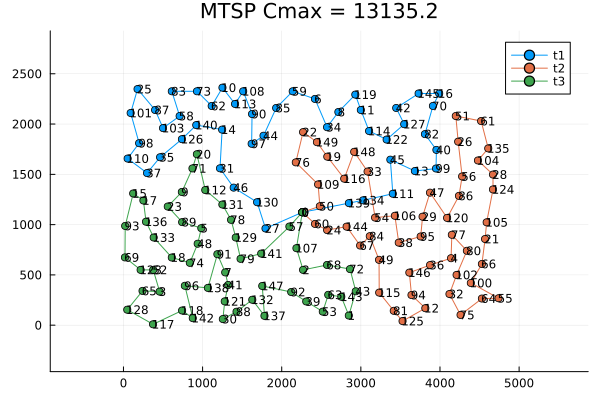

In [297]:
Draw_Solution(best_chrm, Float64.(depot), copy(transpose(customers)), "MTSP", best_chrm.fitness)

In [223]:
chrm = deepcopy(best_chrm)
for tour in chrm.tours
    for i in tour.Sequence
        print(i,", ")
    end
    println()
end

50, 109, 116, 139, 134, 54, 106, 111, 13, 99, 40, 82, 127, 114, 11, 119, 8, 34, 22, 6, 59, 85, 44, 97, 90, 108, 113, 10, 62, 73, 83, 87, 25, 101, 98, 110, 37, 35, 103, 58, 126, 140, 14, 31, 131, 78, 129, 27, 57, 
107, 2, 68, 72, 43, 1, 143, 63, 53, 39, 92, 137, 132, 147, 141, 79, 91, 7, 41, 121, 88, 30, 138, 96, 142, 118, 117, 128, 65, 3, 52, 123, 69, 93, 15, 17, 136, 133, 18, 74, 48, 5, 89, 23, 9, 71, 20, 112, 46, 130, 
76, 149, 19, 148, 33, 45, 122, 42, 145, 70, 16, 51, 26, 61, 135, 104, 28, 124, 105, 21, 66, 100, 55, 64, 75, 32, 102, 4, 80, 77, 120, 86, 56, 47, 29, 95, 36, 146, 94, 12, 125, 81, 115, 49, 38, 84, 67, 144, 24, 60, 


In [224]:
t1 = [76, 149, 19, 148, 33, 45, 122, 114, 11, 119, 8, 34, 22, 6, 59, 85, 44, 97, 90, 108, 113, 10, 62, 73, 83, 87, 25, 101, 98, 110, 37, 35, 103, 58, 126, 140, 14, 31, 46, 130]
t2 = [50, 109, 116, 139, 134, 54, 106, 111, 13, 99, 40, 82, 127, 42, 145, 70, 16, 51, 26, 61, 135, 104, 28, 124, 105, 21, 66, 100, 55, 64, 75, 32, 102, 4, 80, 77, 120, 86, 56, 47, 29, 95, 36, 146, 94, 12, 125, 81, 115, 49, 38, 84, 67, 144, 24, 60]
temp =reverse([107, 2, 68, 72, 43, 1, 143, 63, 53, 39, 92, 137, 132, 147, 141, 79, 91, 7, 41, 121, 88, 30, 138, 96, 142, 118, 117, 128, 65, 3, 52, 123, 69, 93, 15, 17, 136, 133, 18, 74, 48, 5, 89, 23, 9, 71, 20, 112])
t3 = [57, 27, 129, 78, 131]
for i in temp 
    push!(t3, i)
end

Tour 1:
76 149 19 148 33 45 122 114 11 119 8 34 22 6 59 85 44 97 90 108 113 10 62 73 83 
87 25 101 98 110 37 35 103 58 126 140 14 31 46 130 
cost=11467.914676003078
Tour 2:
50 109 116 139 134 54 106 111 13 99 40 82 127 42 145 70 16 51 26 61 135 104 28 124 105 
21 66 100 55 64 75 32 102 4 80 77 120 86 56 47 29 95 36 146 94 12 125 81 115 49 
38 84 67 144 24 60 
cost=14160.401545253095
Tour 3:
57 27 129 78 131 112 20 71 9 23 89 5 48 74 18 133 136 17 15 93 69 123 52 3 65 
128 117 118 142 96 138 30 88 121 41 7 91 79 141 147 132 137 92 39 53 63 143 1 43 72 
68 2 107 
cost=13428.608391678423


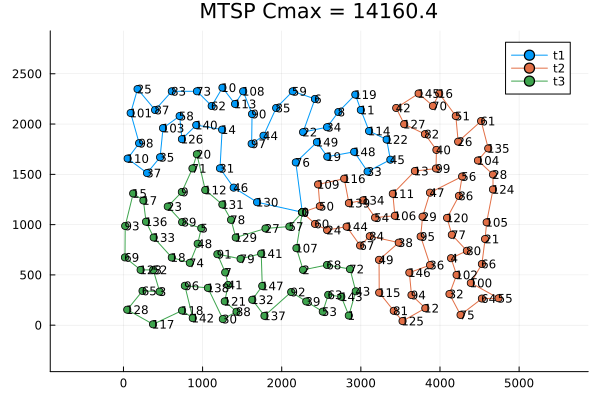

In [256]:
cost1 = find_tour_length(t1, T)
cost2 = find_tour_length(t2, T)
cost3 = find_tour_length(t3, T)

trips = [Tour(t1, cost1), Tour(t2, cost2), Tour(t3, cost3)]
test_chrm = Chromosome(Int[], max(cost1, cost2, cost3), 0.0, trips)
Draw_Solution(test_chrm, Float64.(depot), copy(transpose(customers)), "MTSP", test_chrm.fitness)

In [270]:
chrm = deepcopy(test_chrm)

Chromosome(Int64[], 14160.401545253095, 0.0, Tour[Tour([76, 149, 19, 148, 33, 45, 122, 114, 11, 119  …  37, 35, 103, 58, 126, 140, 14, 31, 46, 130], 11467.914676003078), Tour([50, 109, 116, 139, 134, 54, 106, 111, 13, 99  …  125, 81, 115, 49, 38, 84, 67, 144, 24, 60], 14160.401545253095), Tour([57, 27, 129, 78, 131, 112, 20, 71, 9, 23  …  39, 53, 63, 143, 1, 43, 72, 68, 2, 107], 13428.608391678423)])

In [281]:
include("Neighborhood.jl")
for i=1:1000
    f1 = chrm.fitness
    chrm = N1(chrm, T, Close_nodes, demands, W, n_nodes)
    if chrm.fitness < f1
        println(i)
        break
    end
end

267


Tour 1:
76 149 19 148 33 45 122 114 11 119 8 34 22 6 59 85 44 97 90 108 113 10 62 73 83 
87 25 101 98 110 37 35 103 58 126 140 14 31 46 130 
cost=11842.40816034909
Tour 2:
50 109 116 134 54 111 13 40 127 42 145 16 51 26 61 135 104 28 124 105 21 66 100 55 64 
75 32 102 4 80 77 120 86 56 47 29 95 36 146 94 12 125 81 115 49 38 84 67 144 24 
60 
cost=13675.563538748238
Tour 3:
57 27 129 78 131 112 71 9 23 89 5 48 74 18 133 136 17 15 93 69 123 52 3 65 128 
117 118 142 96 138 30 88 121 41 7 91 79 141 147 132 137 92 39 53 63 143 1 43 72 68 
2 107 
cost=13424.037591945242


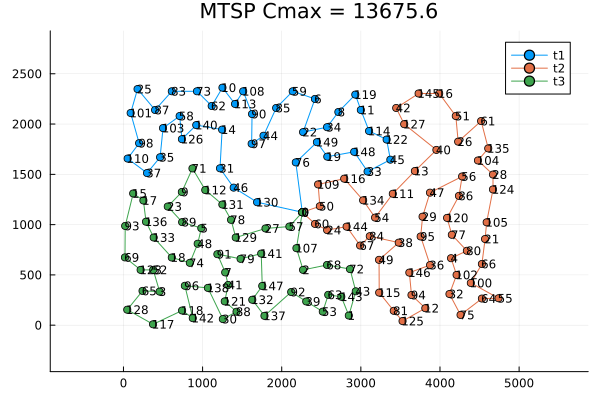

In [282]:
Draw_Solution(chrm, Float64.(depot), copy(transpose(customers)), "MTSP", chrm.fitness)

In [267]:
T[83, 151]

1733.8480325564867

In [ ]:
cost += T[city+1, n_nodes+2]+T[tour[nt]+1, city+1]-T[tour[nt]+1, n_nodes+2]

In [221]:
chrm = deepcopy(best_chrm)
# offspring = scatter_mutation(chrm, T, n_nodes, m, demands, W, copy(transpose(customers)), depot, 0.1)

# Close_nodes = Find_Closeness(T, 0.3)
# Improve_tours(offspring, T, Close_nodes, demands, W, n_nodes)

# Draw_Solution(offspring, depot, copy(transpose(customers)), "mTSP path", offspring.fitness)

Chromosome([50, 109, 116, 139, 134, 54, 106, 111, 13, 99  …  125, 81, 115, 49, 38, 84, 67, 144, 24, 60], 13235.978143415567, 10867.25045787802, Tour[Tour([50, 109, 116, 139, 134, 54, 106, 111, 13, 99  …  58, 126, 140, 14, 31, 131, 78, 129, 27, 57], 13222.40447979904), Tour([107, 2, 68, 72, 43, 1, 143, 63, 53, 39  …  48, 5, 89, 23, 9, 71, 20, 112, 46, 130], 13159.458031741413), Tour([76, 149, 19, 148, 33, 45, 122, 42, 145, 70  …  125, 81, 115, 49, 38, 84, 67, 144, 24, 60], 13235.978143415567)])

In [198]:
function Improve_tours(chrm::Chromosome, TT::Matrix{Float64}, Close_nodes::Matrix{Int}, demands::Vector{Int}, W::Int, n_nodes::Int)
    Search_methods = [Ni1, Ni2, Ni3, Ni4, Ni5, Ni6, Ni7]    #Ni4 not great
    for i=1:100000
        r = rand(1:length(Search_methods))
        search = Search_methods[r]
        chrm = search(chrm, TT, Close_nodes, demands, W, n_nodes)
    end
    return chrm
end

Improve_tours (generic function with 1 method)

In [64]:
T = Read_TSPLIB_instance(:eil51, 1)
n_nodes = size(T)[1]-2
tsp = readTSPLIB(:eil51)
allNodes = tsp.nodes
depot = allNodes[1, :]

Customers = allNodes[2:n_nodes+1, :];

Tour 1:
17 12 40 39 18 
cost=119.94861903593045
Tour 2:
50 46 3 41 43 44 14 36 16 11 45 31 
cost=118.99971321954128
Tour 3:
21 30 27 2 35 34 19 28 20 33 49 15 
cost=118.09674946331543
Tour 4:
7 25 6 22 42 23 24 13 5 47 26 
cost=117.88710859705242
Tour 5:
10 37 4 48 9 32 38 29 8 1 
cost=116.9107497518209


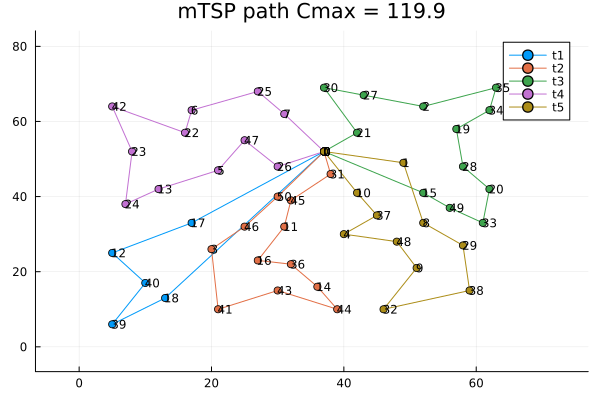

In [133]:
Draw_Solution(chrm, depot, Customers, "mTSP path", chrm.fitness)

5-element Vector{Vector{Float64}}:
 [10.0, 18.8]
 [30.083333333333332, 25.916666666666668]
 [53.75, 54.0]
 [18.09090909090909, 54.18181818181818]
 [49.0, 28.9]

1

In [129]:
all_tours

Int64[]

Tour 1:
24 12 39 
cost=121.29454005694717
Tour 2:
50 46 17 3 40 18 41 43 44 14 36 16 45 31 
cost=137.67703164888556
Tour 3:
21 27 2 35 34 19 28 20 33 49 15 1 
cost=111.1343151485318
Tour 4:
7 30 25 6 22 42 23 13 5 47 26 
cost=120.27696265375617
Tour 5:
10 37 11 4 48 9 32 38 29 8 
cost=128.9363468613924


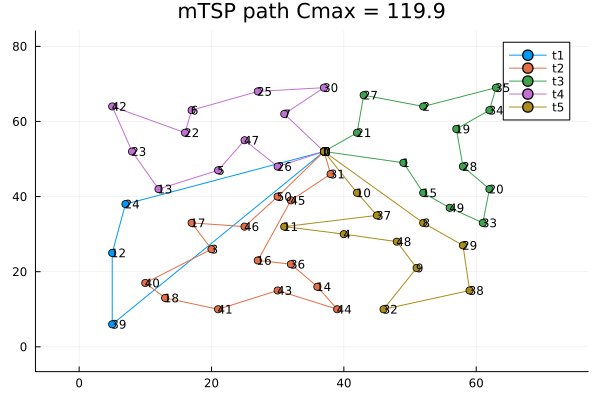

In [157]:
Draw_Solution(chrm, depot, Customers, "mTSP path", chrm.fitness)

Chromosome([24, 12, 39, 50, 46, 17, 3, 40, 18, 41  …  10, 37, 11, 4, 48, 9, 32, 38, 29, 8], 136.30049539635337, 0.0, Tour[Tour([24, 12, 39, 50], 121.3531768339278), Tour([46, 17, 3, 40, 18, 41, 43, 44, 14, 36, 16, 45], 136.30049539635337), Tour([31, 21, 27, 2, 35, 34, 19, 28, 20, 33, 49, 15, 1], 121.85070977768416), Tour([7, 30, 25, 6, 22, 42, 23, 13, 5, 47, 26], 120.27696265375617), Tour([10, 37, 11, 4, 48, 9, 32, 38, 29, 8], 128.9363468613924)])

Tour 1:
24 12 39 50 
cost=121.3531768339278
Tour 2:
46 17 3 40 18 41 43 44 14 36 16 45 
cost=136.30049539635337
Tour 3:
31 21 27 2 35 34 19 28 20 33 49 15 1 
cost=121.85070977768416
Tour 4:
7 30 25 6 22 42 23 13 5 47 26 
cost=120.27696265375617
Tour 5:
10 37 11 4 48 9 32 38 29 8 
cost=128.9363468613924


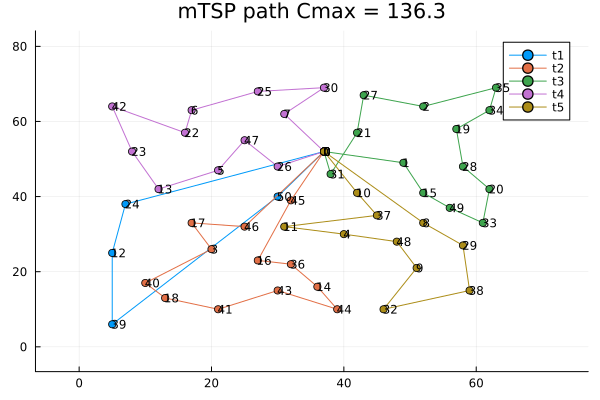

In [160]:
Draw_Solution(chrm1, depot, Customers, "mTSP path", chrm1.fitness)

2

Tour 1:
12 40 39 18 
cost=119.8090283167237
Tour 2:
50 46 17 3 41 43 44 14 36 16 11 45 31 
cost=126.86749439779709
Tour 3:
21 30 27 2 35 34 19 28 20 33 49 15 
cost=118.09674946331543
Tour 4:
7 25 6 22 42 23 24 13 5 47 26 
cost=117.88710859705242
Tour 5:
10 37 4 48 9 32 38 29 8 1 
cost=116.9107497518209


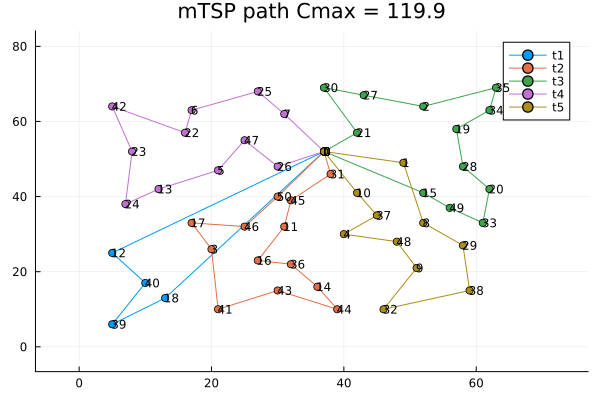

In [52]:
sortperm(chrm.tours, by=x->x.cost, rev=true)

5-element Vector{Int64}:
 1
 2
 3
 4
 5

In [53]:
chrm.tours

5-element Vector{Tour}:
 Tour([17, 12, 40, 39, 18], 119.94861903593045)
 Tour([50, 46, 3, 41, 43, 44, 14, 36, 16, 11, 45, 31], 118.99971321954128)
 Tour([21, 30, 27, 2, 35, 34, 19, 28, 20, 33, 49, 15], 118.09674946331543)
 Tour([7, 25, 6, 22, 42, 23, 24, 13, 5, 47, 26], 117.88710859705242)
 Tour([10, 37, 4, 48, 9, 32, 38, 29, 8, 1], 116.9107497518209)

put_city_in_one_tour (generic function with 1 method)

In [71]:
a = [100, 200]
findfirst(x->x==100, a)

1

In [105]:
find_tour_length([12, 40, 39], T)

119.42157284105542